## Problem: Advect a top-hat function

Write a code to solve the 1-d linear advection equation using a first-order explicit (upwind) discretisation scheme:

$$u_i^{j+1} =u_i^j - c\frac{\Delta t}{\Delta x}(u_i^j - u_{i-1}^j )$$


on the domain $[0,1]$ with $c=1$ and periodic boundary conditions. For initial conditions, try a top-hat function:

$$ 
u(x,0)= 
     \begin{cases}
       0, & x < 1/3\\
       1, & 1/3 \leq x \leq 2/3,\\
       0, & x > 2/3,\\
     \end{cases}
$$

**Note:**

For a general treatment of boundary conditions, you would initialize the ghost points to their corresponding periodic data and apply the difference equations to zones $0,..., N − 1$. However, for periodic BCs on this grid, points $0$ and $N − 1$ are identical, so you could do the update in this special case on points $1,..., N − 1$ without the need for ghost points and then set $u_0 = u_N−1$ after the update.

Run you program for one or more periods (one period is $T = 1/c$) with several different CFL numbers and notice that there is substantial numerical dissipation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create domain

xmin = 0.
xmax = 1.

# Number of points on the grid
Nx = 101

# Number of ghost cells
Ng = 1

# Step size
delta_x = (xmax - xmin)/(Nx - 1)

# Define x-axis
x = np.arange(xmin - Ng*delta_x , xmax + (Ng + 1)*delta_x, delta_x)

print(x.shape)
#print(x)

(103,)


### Initial profile:

In [3]:
def top_hat(x):
    
    if (1/3 <= x <= 2/3):
        return 1.0
    else:
        return 0.0

In [4]:
# y axis
y = []

for j in range(len(x)):
    
    y.append(top_hat(x[j]))

y = np.array(y)

print(x.shape, y.shape)

(103,) (103,)


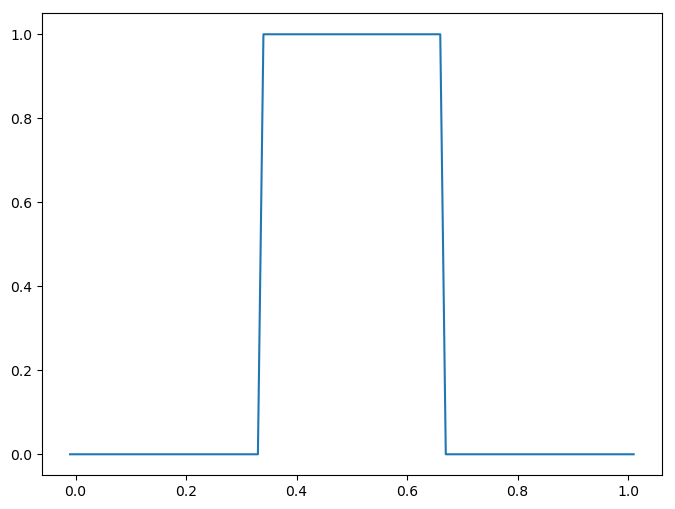

In [5]:
# Plot the initial profile

plt.figure(figsize = (8,6))
plt.plot(x, y)
plt.show()



### Solution array:

In [6]:
# Empty array that will store our slns
u_sln0 = np.zeros((len(x)), dtype=np.float64)
u_sln  = np.zeros((len(x)), dtype=np.float64)

print(u_sln0.shape, u_sln.shape)

# This is the initial vector
y_0 = y.copy()
u_sln0 = y.copy()

# Alternative code for the initial vector

#u_sln0[:] = 0.0
#u_sln0[np.logical_and(x >= 1./3., x <= 2./3.)] = 1.0
#print(u_sln0.shape)

#print(u_sln0)

(103,) (103,)


In [7]:
# Time discretisation
CFL = 0.5 ## <= 1
c = 1.0

# Time step
delta_t = CFL*delta_x/c

# Time -> 1 period so that the profile stays on spot
t_period = (xmax - xmin)/c

# Initialise time at t=0
t = 0.

#print(Ng-1, Nx+Ng-2)
#print(Ng+1, Nx+Ng)

# While statement
while t < t_period:
    
    u_sln0[Ng-1]  = u_sln0[Nx+Ng-2]
    u_sln0[Nx+Ng] = u_sln0[Ng+1]
    
    for i in range(Ng, Ng+Nx):
        u_sln[i] = u_sln0[i] - CFL*(u_sln0[i] - u_sln0[i-1])
        
    u_sln0[:] = u_sln[:]
    t += delta_t

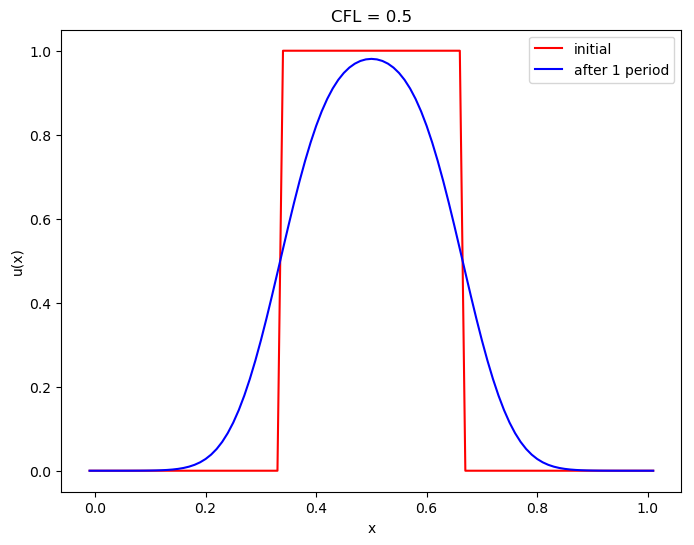

In [8]:
    
# Plot the initial profile

plt.figure(figsize = (8,6))
plt.title(f"CFL = {CFL}")
plt.plot(x, y_0, color = "red", label ="initial")
plt.plot(x, u_sln, color = "blue", label="after 1 period")

plt.xlabel(r"x")
plt.ylabel(r"u(x)")
plt.legend()
plt.show()

In [9]:
ilo = Ng
ihi = Ng+Nx-1

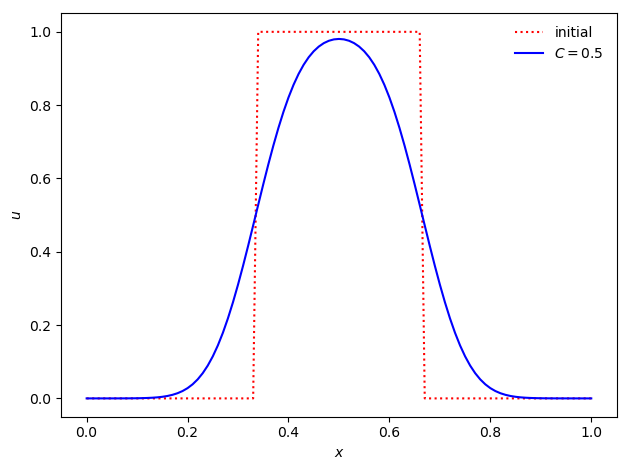

In [10]:
plt.plot(x[Ng:Ng+Nx], y_0[Ng:Ng+Nx], ls=":", color = 'red', label="initial")

plt.plot(x[Ng:Ng+Nx],u_sln[Ng:Ng+Nx], color = 'blue', label=r"$C = {}$".format(CFL))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()